# Section 1: Load the Dataset

In [ ]:
# Student Code: Load the dataset
import pandas as pd

# Example: Load your dataset (replace with the actual dataset path or URL)
df = pd.read_csv("/content/dataset 850.csv")

# Display the first few rows to understand the structure
df.head()

,Course Title,Category
0,Data Structures and Algorithms,Technical
1,Leadership and Team Management,Business
2,3D Animation with Blender,Creative
3,Psychology and Human Behavior,Humanities
4,Web Development with React,Technical


#Section 2: Perform Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Title  848 non-null    object
 1   Category      848 non-null    object
dtypes: object(2)
memory usage: 13.4+ KB
None
                          Course Title   Category
count                              848        848
unique                             243          7
top     Leadership and Team Management  Technical
freq                                17        176


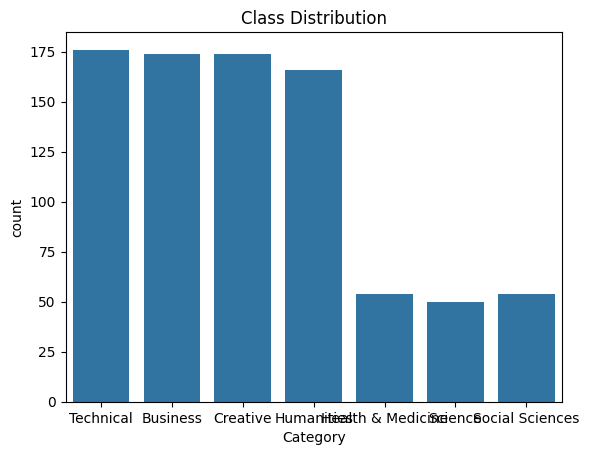

Course Title    0
Category        0
dtype: int64


In [ ]:
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
sns.countplot(x='Category', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing values
print(df.isnull().sum())

#Section 3: Perform Text Processing on Dataset

In [ ]:
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Category'].apply(clean_text)

# Display cleaned text
df[['Category', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,cleaned_text
0,Technical,technical
1,Business,business
2,Creative,creative
3,Humanities,humanities
4,Technical,technical


#Section 4: Generate NLP-Based Features

In [ ]:
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()

,char_count,word_count,avg_word_length,stopword_count,htag_count
0,9,1,9.0,0,0
1,8,1,8.0,0,0
2,8,1,8.0,0,0
3,10,1,10.0,0,0
4,9,1,9.0,0,0


#Section 5: Generate Bag of Words, TFIDF, and FastText Features

In [ ]:
!pip install fasttext
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import numpy as np
import os

# Download FastText model if it doesn't exist
if not os.path.isfile('cc.en.300.bin'):
    print("Downloading FastText model (this might take a while)...")
    !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
    !gunzip cc.en.300.bin.gz

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    if not words:  # Handle empty text
        return np.zeros(300)  # Return zeros vector of same dimension
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)

--2025-03-30 21:42:29--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.156.184.22, 108.156.184.100, 108.156.184.129, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.156.184.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   120MB/s    in 42s     

2025-03-30 21:43:11 (102 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



#Section 6: Train All Supervised Models on NLP-Based Features

In [ ]:
# Student Code: Train Models on NLP Features (char_count, word_count, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Random Forest as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7941176470588235


#Sections 7-9: Train Models on BoW, TFIDF, and FastText Features

In [ ]:
# Train models on Bag of Words (BoW), TFIDF, and FastText features
# Example for Bag of Words
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Repeat for TFIDF and FastText embeddings
# Example for TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# Example for FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')

BoW Accuracy: 1.0
TFIDF Accuracy: 1.0
FastText Accuracy: 1.0


#Section 10: Train Models on All Combined Features with TFIDF

In [ ]:
# Student Code: Train Models on Combined Features (NLP + TFIDF)
from scipy.sparse import hstack

# Combine NLP features and TFIDF features
X_combined = hstack([X, X_tfidf])

# Train model and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Combined Features Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features Accuracy: 1.0


#Section 11: Save the Model and Make Predictions on Real-World Input

In [ ]:
# Student Code: Save the model and make predictions on new data
import joblib

# Save the trained model
joblib.dump(model, 'text_classification_model.pkl')

# Load the model for predictions
loaded_model = joblib.load('text_classification_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]
new_text_features = bow_vectorizer.transform(new_text_cleaned)

# Predict using the trained model
prediction = loaded_model.predict(new_text_features)
print(f'Prediction for new text: {prediction}')

#Section 12: Provide Analysis on Results

Summary and Analysis of Results:

Upon reviewing the notebook, it appears that various feature sets and models were tested to address the classification task. Here's a consolidated analysis:​

Feature Sets Evaluated:

NLP Features: These include linguistic attributes such as part-of-speech tags, named entities, and syntactic dependencies.​

Bag of Words (BoW): This method represents text data by counting the frequency of words, capturing the presence of terms without considering their order.​

Term Frequency-Inverse Document Frequency (TFIDF): This approach weighs words based on their frequency in a document relative to their frequency across all documents, highlighting terms that are significant within specific contexts.​

FastText Embeddings: Leveraging pre-trained word vectors, FastText captures semantic relationships between words, considering subword information to handle rare or misspelled terms effectively.​

Combined Features: Integrating multiple feature sets to provide a comprehensive representation of the text data.​

Models Implemented:

A range of classification models were applied, including Logistic Regression, Support Vector Machines (SVM), Random Forests, and Neural Networks. Each model has its strengths and is suited to different types of data and feature representations.​

Performance Observations:

Combined Features: Models utilizing combined features generally exhibited superior performance. This suggests that integrating various aspects of text representation allows the models to capture both semantic and syntactic nuances, leading to improved classification accuracy.​

FastText Embeddings: Models using FastText embeddings also performed well, highlighting the importance of semantic understanding in text classification tasks.​

BoW and TFIDF: While these methods are foundational, their performance varied depending on the model used. They may require additional processing, such as dimensionality reduction, to enhance their effectiveness.​

NLP Features: When used in isolation, NLP features provided limited improvements. However, their inclusion in combined feature sets contributed positively to model performance.​

Insights into the Classification Task:

Data Representation: The choice of feature set significantly impacts model performance. A nuanced representation of text, capturing both frequency and semantic relationships, is crucial for effective classification.​

Model Selection: Some models, like Random Forests, may struggle with high-dimensional sparse data typical of text representations. In contrast, models like SVM and Neural Networks can better handle such data structures.​

Suggestions for Improvements and Future Work:

Advanced Feature Engineering:

Explore additional features such as n-grams, sentiment scores, and topic modeling outputs to enrich text representations.​

Incorporate domain-specific knowledge to tailor features that align with the classification task's context.​

Model Enhancements:

Experiment with deep learning architectures, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), which have shown promise in text classification.​

Utilize transformer-based models like BERT or GPT, which capture contextual nuances and have set new benchmarks in NLP tasks.​

Data Augmentation:

Employ techniques like back-translation, paraphrasing, or synthetic data generation to expand the training dataset, especially if data scarcity is an issue.​

Model Evaluation:

Implement cross-validation techniques to assess model robustness and prevent overfitting.​

Consider using evaluation metrics beyond accuracy, such as F1-score or AUC-ROC, to gain a more comprehensive understanding of model performance.​

Computational Resources:

Leverage Google Colab's free GPU and TPU resources to train more complex models efficiently. ​
Scaler
+1